## 04 – Analysis of the Counterflow Configuration

In this notebook we analyze:
- the shear rate on the left wall  
- the diffusion layer thickness 
using:
- velocity field from notebook 01
- nitrogen transport from 02
- steady-state index from 03
- analysis utilities from `analysis.py`


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

# Adjust path so Python can find ../src
project_root = os.path.abspath("..")
src_path = os.path.join(project_root, "src")

if src_path not in sys.path:
    sys.path.append(src_path)

print("Added to PYTHONPATH:", src_path)
from counterflow.analysis import (compute_shear_evolution,compute_diffusive_thickness)

Added to PYTHONPATH: /Users/emma.grospellier/Final-project-M2-Combustion-of-methane-in-a-countercurrent-configuration/src


In [7]:
u = np.load("../data/u.npy")
v = np.load("../data/v.npy")
p = np.load("../data/p.npy")
YN2 = np.load("../data/YN2.npy")

Nx = int(np.loadtxt("../data/Nx.txt"))
dx = float(np.loadtxt("../data/dx.txt"))
Nstat = int(np.loadtxt("../data/Nstat.txt"))
Nt = int(np.loadtxt("../data/Nt.txt"))
rho = int(np.loadtxt("../data/rho.txt"))
nu = int(np.loadtxt("../data/nu.txt"))

YCH4 = np.load("../data/YCH4.npy")
YO2  = np.load("../data/YO2.npy")
YCO2 = np.load("../data/YCO2.npy")
YH2O = np.load("../data/YH2O.npy")
T    = np.load("../data/T.npy")
print("Data successfully loaded.")

Data successfully loaded.
[[7.90000000e-01 7.90000000e-01 7.90000000e-01 7.90000000e-01]
 [7.90000000e-01 7.90000000e-01 7.90000000e-01 7.90000000e-01]
 [7.90000000e-01 7.90000000e-01 7.90000000e-01 7.90000000e-01]
 ...
 [0.00000000e+00 3.91991182e-27 3.05535422e-12 7.58108468e-01]
 [0.00000000e+00 5.77822370e-29 6.00189276e-13 7.56369006e-01]
 [0.00000000e+00 5.77822370e-29 6.00189276e-13 7.56369006e-01]]


In [3]:
# Local index function

results = compute_shear_evolution(v, Nx, Nt, dx, Nstat)

dv_dy, dv_dy_max, abs_max_value, abs_max_position, stat_max_value, stat_max_position = results

print("Absolute shear maximum =", round(abs_max_value,2), "s^-1 at y =", round(abs_max_position,5), "m")
print("Steady-state shear maximum =", round(stat_max_value,2), "s^-1 at y =", round(stat_max_position,5), "m")

Absolute shear maximum = 24500.0 s^-1 at y = 0.0 m
Steady-state shear maximum = 1482.87 s^-1 at y = 0.00098 m


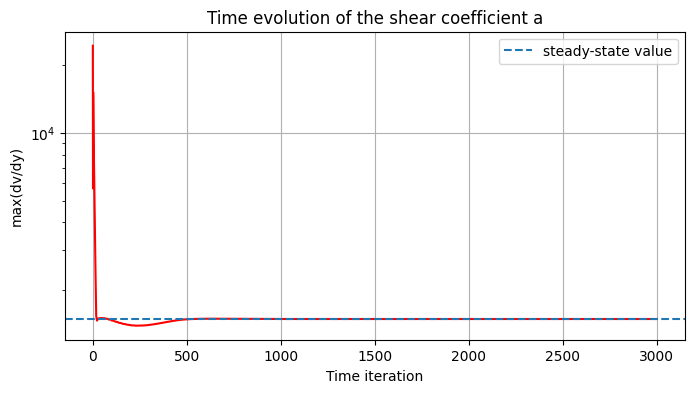

In [4]:
plt.figure(figsize=(8,4))
plt.plot(dv_dy_max, 'r')
plt.yscale("log")
plt.grid(True)
plt.xlabel("Time iteration")
plt.ylabel("max(dv/dy)")
plt.title("Time evolution of the shear coefficient a")
plt.axhline(stat_max_value, linestyle="--", label="steady-state value")
plt.legend()
plt.show()

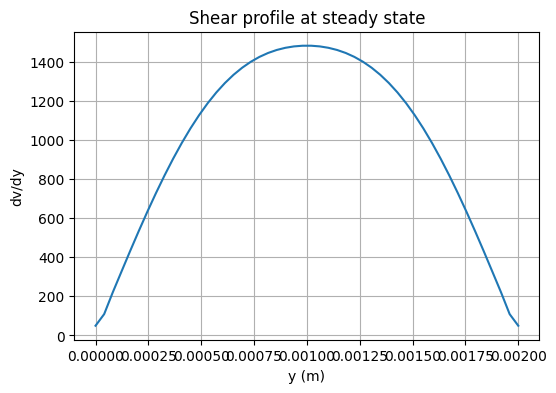

In [5]:
plt.figure(figsize=(6,4))
y = np.linspace(0, (Nx-1)*dx, Nx)

plt.plot(y, dv_dy[:, Nstat])
plt.xlabel("y (m)")
plt.ylabel("dv/dy")
plt.grid(True)
plt.title("Shear profile at steady state")
plt.show()

The average values of deformation coefficients along a wall generally lie between $10^2$ and $10^5$ $s^{-1}$
, which suggests that our coefficient fits perfectly within this order of magnitude. It is higher near the upper and lower corners on the left simply because the velocity is greatest there, and it is purely in the y-direction. It is therefore logical for the coefficient to reach its maximum in these regions. We also observed that the velocities are almost zero halfway up the left wall, which further confirms that the velocity gradient is larger near the corners.

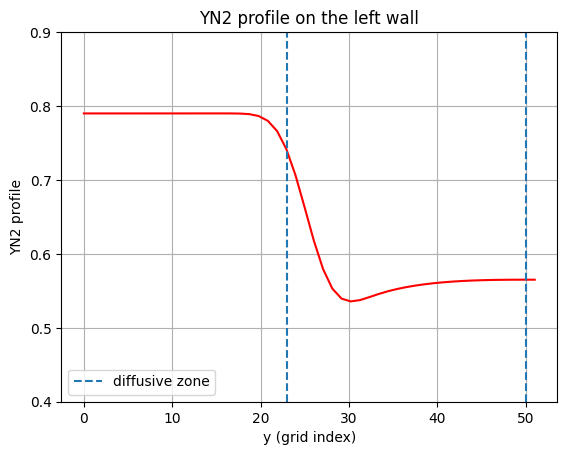

Diffusive zone thickness = 0.001102 m
Start index = 23


In [8]:
thickness, idx_start = compute_diffusive_thickness(YN2, Nx, dx)

print("Diffusive zone thickness =", round(thickness,6), "m")
print("Start index =", idx_start)

The diffusive zone on the left boundary has the shape of a hyperbolic tangent under steady-state conditions. We can see that for values of y near 0, the concentration is 0.79, which corresponds to the injection value. In contrast, for y values near the top of the box, the concentration is much lower (around 0.5) and is influenced by the diffusion of the nitrogen injected at the top. We therefore observe that in the region where N2 is injected directly against the wall, there is essentially no diffusion, since all particles move to the right. Otherwise, we would expect to see an increase in concentration, which is not the case. Diffusion is much clearer in the upper part of the box, where the nitrogen particles that are not injected along the left boundary diffuse toward it. The decreasing zone we observe corresponds to the transition region between the upper diffusion zone and the lower injection zone. The thickness of the diffusive zone is: 0.0011 m.